<a href="https://colab.research.google.com/github/NSALHI1/Movie-Recommendation/blob/main/Movies_full_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install gradio
!pip install matplotlib
!pip install pandas

In [17]:
import pandas as pd
# Load the dataset using raw string notation
movies_df = pd.read_csv(r'/content/MyMovies.csv')
# Display the first few rows of the dataset
print(movies_df.head(3))

   movie_id            title  vote_average  vote_count    status release_date  \
0   4520010        Inception         8.364       34495  Released    7/15/2010   
1   4520011     Interstellar         8.417       32571  Released    11/5/2014   
2   4520012  The Dark Knight         8.512       30619  Released    7/16/2008   

      revenue  adult     budget    imdb_id original_language   original_title  \
0   825532764  False  160000000  tt1375666                en        Inception   
1   701729206  False  165000000  tt0816692                en     Interstellar   
2  1004558444  False  185000000  tt0468569                en  The Dark Knight   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   

                               genres  \
0  Action, Science Fiction, Adventur

In [18]:
# Function to clean the genres column, handling missing values
def clean_genres(genres):
    if isinstance(genres, str):
        return genres.split(', ')
    return []  # Return an empty list if the value is NaN or None

movies_df['genres'] = movies_df['genres'].apply(clean_genres)

# Function to clean the spoken_languages column similarly
def clean_languages(languages):
    if isinstance(languages, str):
        return languages.split(', ')
    return []

movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(clean_languages)

In [19]:
# Create lists of unique genres and languages
genre_list = sorted(set(genre for sublist in movies_df['genres'] for genre in sublist if genre))
language_list = sorted(set(language for sublist in movies_df['spoken_languages'] for language in sublist if language))

print("Available Genres:", genre_list)
print("Available Languages:", language_list)

Available Genres: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
Available Languages: ['Afrikaans', 'Albanian', 'Arabic', 'Armenian', 'Bengali', 'Breton', 'Bulgarian', 'Cantonese', 'Chichewa; Nyanja', 'Croatian', 'Czech', 'Danish', 'Dutch', 'English', 'Esperanto', 'Estonian', 'Finnish', 'French', 'Gaelic', 'German', 'Greek', 'Haitian; Haitian Creole', 'Hebrew', 'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Inuktitut', 'Irish', 'Italian', 'Japanese', 'Khmer', 'Korean', 'Latin', 'Malay', 'Mandarin', 'Nepali', 'Norwegian', 'Persian', 'Polish', 'Portuguese', 'Romanian', 'Russian', 'Samoan', 'Sinhalese', 'Somali', 'Sotho', 'Spanish', 'Swahili', 'Swedish', 'Tagalog', 'Tamil', 'Thai', 'Tibetan', 'Turkish', 'Ukrainian', 'Urdu', 'Vietnamese', 'Xhosa', 'Yiddish', 'Zulu']


In [20]:
# Define the recommendation function
def recommend_movies(selected_genres, selected_language):
    if not selected_genres and not selected_language:
        # Return an empty DataFrame if no selection is made
        return pd.DataFrame(columns=['title', 'genres', 'spoken_languages'])

    # Filter movies based on selected genres
    recommended = movies_df[movies_df['genres'].apply(lambda x: any(genre in x for genre in selected_genres))]

    # Further filter based on selected spoken language
    recommended = recommended[recommended['spoken_languages'].apply(lambda x: selected_language in x)]

    # Return a sample of 5 recommendations, or all if fewer than 5
    if not recommended.empty:
        return recommended[['title', 'genres', 'spoken_languages']].sample(n=min(5, len(recommended)))
    else:
        return pd.DataFrame(columns=['title', 'genres', 'spoken_languages'])

# Explode genres into separate rows for analysis
genre_ratings = movies_df.explode('genres')


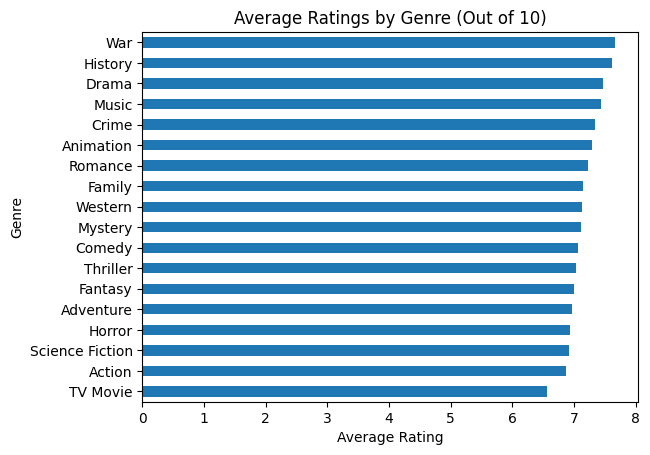

In [13]:
import matplotlib.pyplot as plt
# Calculate the average rating by genre
avg_rating_by_genre = genre_ratings.groupby('genres')['vote_average'].mean().sort_values()

# Plot the average ratings by genre
avg_rating_by_genre.plot(kind='barh')
plt.title('Average Ratings by Genre (Out of 10)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [21]:
import gradio as gr
# Create the Gradio interface
iface = gr.Interface(
    fn=recommend_movies,
    inputs=[
        gr.CheckboxGroup(genre_list, label="Select Genres"),
        gr.Dropdown(language_list, label="Select Language", multiselect=False)
    ],
    outputs=gr.DataFrame(label="Recommended Movies"),
    title="Movie Recommendation System",
    description="Choose your favorite genres and a language to receive personalized movie recommendations"
)

# Launch the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d7dacce82712a03977.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
